<a href="https://colab.research.google.com/github/grkidwell/Inductor_pdiss/blob/add-colab-forms/Inductor_pdiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inductor Power Dissipation

[Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

[Primer for Learning Google Colaboratory](https://medium.com/dair-ai/primer-for-learning-google-colab-bb4cabca5dd6)

[Colab Examples](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true)


### Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [0]:
!git clone https://github.com/grkidwell/Inductor_pdiss.git

Cloning into 'Inductor_pdiss'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


###Inductor Specs

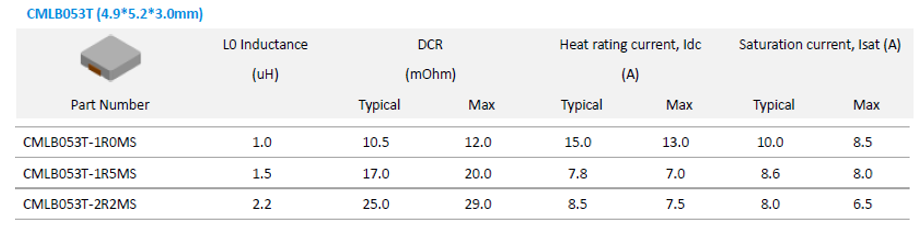

In [0]:
Image('Inductor_pdiss/CMLB053.PNG', width=800)

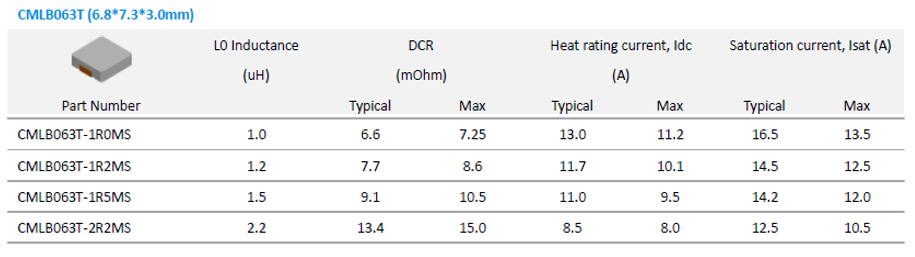

In [0]:
Image('Inductor_pdiss/CMLB063.PNG', width=800)

In [0]:
#@title
#Cyntec CMLB053T 5x5x3mm family

#                     X,Y,Z    Lout     DCR     k1       k2       k3     k4
Lparam_5x5x3_0R56 = ("5x5x3",  560e-9, .008,  7.14e-4, 1.028, 0.00956, 2.518)
Lparam_5x5x3_0R68 = ("5x5x3",  680e-9, .0086, 7.15e-4, 1.028, 0.01060, 2.518)
Lparam_5x5x3_1R0  = ("5x5x3", 1000e-9, .011,  6.42e-4, 1.028, 0.01465, 2.518)
Lparam_5x5x3_1R5  = ("5x5x3", 1500e-9, .0185, 6.57e-4, 1.028, 0.01562, 2.518)

CMLB053T = [["5x5x3", 560e-9, .008,  7.14e-4, 1.028, 0.00956, 2.518],
            ["5x5x3", 680e-9, .0086, 7.15e-4, 1.028, 0.01060, 2.518],
            ["5x5x3",1000e-9, .011,  6.42e-4, 1.028, 0.01465, 2.518],
            ["5x5x3",1500e-9, .0185, 6.57e-4, 1.028, 0.01562, 2.518]]


#Cyntec CMLB063T 6x6x3mm family

#                    X,Y,Z     Lout     DCR     k1       k2       k3     k4
Lparam_7x7x3_1R0 = ("7x7x3", 1000e-9, .007,  1.42e-3, 1.028, 0.00923, 2.518)
Lparam_7x7x3_1R5 = ("7x7x3", 1500e-9, .010,  1.28e-3, 1.028, 0.01124, 2.518)
Lparam_7x7x3_2R2 = ("7x7x3", 2200e-9, .014,  1.43e-3, 1.028, 0.01373, 2.518)



In [0]:
CMLB053T[0][1]

5.6e-07

In [0]:
Inductor_list= [Lparam_5x5x3_1R5, Lparam_5x5x3_1R5]

In [0]:
Inductor_list[0]

('5x5x3', 1.5e-06, 0.0185, 0.000657, 1.028, 0.01562, 2.518)

In [0]:
#Inductor_list.index[2](.0185)

In [0]:
#@title Default title text


### Parameters

In [0]:

Padaptor = 65

#These are default values but can be changed when the function is called.
Vin_nom  = 20
Vout_nom = 7.4
Iout_nom = Padaptor/Vout_nom*.95
Fs_nom   = 1e6
   

### Functions and Classes

In [0]:
  
    
              
class Inductor_CCM:
    
    def __init__(self, vin=Vin_nom, vout=Vout_nom, iout=Iout_nom, fs=Fs_nom, 
                 Lparam=Lparam_5x5x3_1R0):
        self.vin  = vin
        self.vout = vout
        self.idc  = iout
        self.fs   = fs
        
        self.xyz = Lparam[0]
        self.lout= Lparam[1]
        self.dcr = Lparam[2]    
        self.k1  = Lparam[3]
        self.k2  = Lparam[4]
        self.k3  = Lparam[5]
        self.k4  = Lparam[6]
        
        self.ipp   = (self.vin-self.vout)*self.vout/self.vin/self.lout/self.fs
        self.irms  = (self.idc**2+(self.ipp**2)/12)**0.5
        self.pcore = self.k1*self.fs**self.k2*(self.k3*self.ipp)**self.k4
        self.pdc   = self.dcr*self.irms**2
        self.tot   = self.pcore+self.pdc 
        
   #     self.losses = [self.pdc, self.pcore, self.tot]    
        
    def losses(self):
        print("%s, %2.1fuH   %3.3fMHz  %3.3fW   %3.3fW   %3.3fW" % 
              (self.xyz,self.lout*1e6,self.fs/1e6, self.pdc, self.pcore, self.tot))
        


 

### Results



1.   List item

1.   List item
2.   List item


2.   List item


$Ptotal = Irms^2\cdot DCR + k1\cdot {Fs}^{k2}({k3\cdot \Delta I})^{k4}$

In [0]:
#@title
print(" XYZ    Lout    Fs        Pdc     Pcore    Ptotal")
Inductor_CCM(fs=1.5e6,Lparam=Lparam_5x5x3_1R0).losses()
Inductor_CCM(fs=1.0e6,Lparam=Lparam_5x5x3_1R0).losses()
Inductor_CCM(fs=0.777e6,Lparam=Lparam_5x5x3_1R0).losses()
print("")
Inductor_CCM(fs=1.5e6,Lparam=Lparam_5x5x3_1R5).losses()
Inductor_CCM(fs=1.0e6,Lparam=Lparam_5x5x3_1R5).losses()
print("")
Inductor_CCM(fs=0.777e6,Lparam=Lparam_7x7x3_1R0).losses()
Inductor_CCM(fs=0.777e6,Lparam=Lparam_7x7x3_1R5).losses()
Inductor_CCM(fs=0.500e6,Lparam=Lparam_7x7x3_2R2).losses()



 XYZ    Lout    Fs        Pdc     Pcore    Ptotal
5x5x3, 1.0uH   1.500MHz  0.775W   0.600W   1.375W
5x5x3, 1.0uH   1.000MHz  0.786W   1.098W   1.884W
5x5x3, 1.0uH   0.777MHz  0.799W   1.599W   2.398W

5x5x3, 1.5uH   1.500MHz  1.295W   0.260W   1.555W
5x5x3, 1.5uH   1.000MHz  1.303W   0.476W   1.779W

7x7x3, 1.0uH   0.777MHz  0.508W   1.105W   1.614W
7x7x3, 1.5uH   0.777MHz  0.710W   0.589W   1.299W
7x7x3, 2.2uH   0.500MHz  0.996W   0.801W   1.797W


###3S Battery

In [0]:
#@title Inductor Parameters { run: "auto" }
Inductor_CCM(fs=1.5e6,Lparam=Lparam_5x5x3_1R5,vout=11.1,iout=65/11.1*.95).losses()
